In [22]:
import nltk
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt
import re
from collections import Counter

%matplotlib inline

In [2]:
bible = gutenberg.open('bible-kjv.txt')
bible = bible.readlines()
bible[:5]

['[The King James Bible]\n',
 '\n',
 'The Old Testament of the King James Bible\n',
 '\n',
 'The First Book of Moses:  Called Genesis\n']

In [3]:
len(bible)

99805

In [5]:
bible = list(filter(None, [item.strip('\n') for item in bible]))
bible[:5]

['[The King James Bible]',
 'The Old Testament of the King James Bible',
 'The First Book of Moses:  Called Genesis',
 '1:1 In the beginning God created the heaven and the earth.',
 '1:2 And the earth was without form, and void; and darkness was upon']

In [6]:
len(bible)

74645

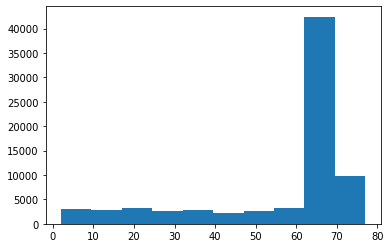

In [7]:
line_lengths = [len(sentence) for sentence in bible]
h = plt.hist(line_lengths)

#### Most of the sentences are around 65-70 characters.

In [8]:
tokens = [item.split() for item in bible]
print(tokens[:5])

[['[The', 'King', 'James', 'Bible]'], ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'], ['The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis'], ['1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth.'], ['1:2', 'And', 'the', 'earth', 'was', 'without', 'form,', 'and', 'void;', 'and', 'darkness', 'was', 'upon']]


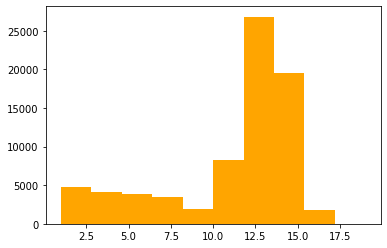

In [10]:
total_tokens_per_line = [len(sentence.split()) for sentence in bible]
h = plt.hist(total_tokens_per_line, color='orange')

#### We can clearly conclude that most sentences in the Bible have roughly 12-15 words

In [11]:
words = [word for sentence in tokens for word in sentence]
print(words[:20])

['[The', 'King', 'James', 'Bible]', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis', '1:1']


#### However, you can see the tokens are not totally clean and we have some unwanted symbols and special characters in some of the words.

In [15]:
words = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for word in words]))
print(words[:20])

['The', 'King', 'James', 'Bible', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', 'Called', 'Genesis', 'In']


In [20]:
words = [word.lower() for word in words]
c = Counter(words)
c.most_common(10)

[('the', 64023),
 ('and', 51696),
 ('of', 34670),
 ('to', 13580),
 ('that', 12912),
 ('in', 12667),
 ('he', 10419),
 ('shall', 9838),
 ('unto', 8997),
 ('for', 8970)]

#### Need to remove these stopwords, and then compute the frequency as follows.

In [23]:
stopwords = nltk.corpus.stopwords.words('english')
words = [word.lower() for word in words if word.lower() not in stopwords]
c = Counter(words)
c.most_common(10)

[('shall', 9838),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4442),
 ('said', 3999),
 ('ye', 3983),
 ('thee', 3826),
 ('upon', 2748)]

#### Thus, we see that the results are better than before; however, many words are still filler or stopwords. This is more colloquial English, hence they are not a part of the standard English stopwords list so they were not removed. We can always build a custom stopword list as needed. This should give you a good idea of how we used all aspects pertaining to strings, methods, and transformations to process and analyze text data.